In [1]:
# obtain data
from torchvision import datasets, transforms

mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)
mnist_train = mnist_data[:4096]
mnist_val   = mnist_data[4096:5120]

100%|██████████| 9.91M/9.91M [00:10<00:00, 983kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.03MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.85MB/s]


In [13]:
import torch 
import torch.nn as nn
import torch.nn.functional as fc

from torchvision import datasets, transforms

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1)

# define model 

class Mnist_Classification_NN(nn.Module):
    def __init__(self):
        super(Mnist_Classification_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) # input layer to hidden layer
        self.fc2 = nn.Linear(128, 64)    # hidden layer to hidden
        self.fc3 = nn.Linear(64, 10)     # hidden layer to output layer
    def forward(self, x):
        x = x.view(-1, 28*28)            # flatten the image
        x = fc.relu(self.fc1(x))        # activation function for hidden layer 1
        x = fc.relu(self.fc2(x))        # activation function for hidden layer 2
        x = self.fc3(x)                 # output layer (no activation function)
        return x
    
model = Mnist_Classification_NN()
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()



In [14]:
def get_accuracy(model, train=False):
    if train:
        data = mnist_train
    else:
        data = mnist_val

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

print ('done')

done


In [15]:
def train(model, data, batch_size=64, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


print('done')

done


## Sanity Check

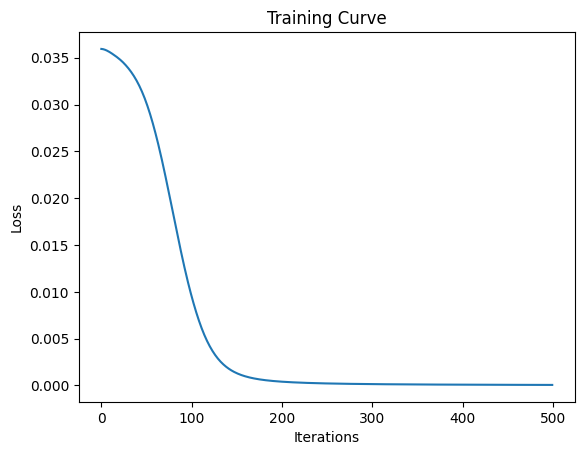

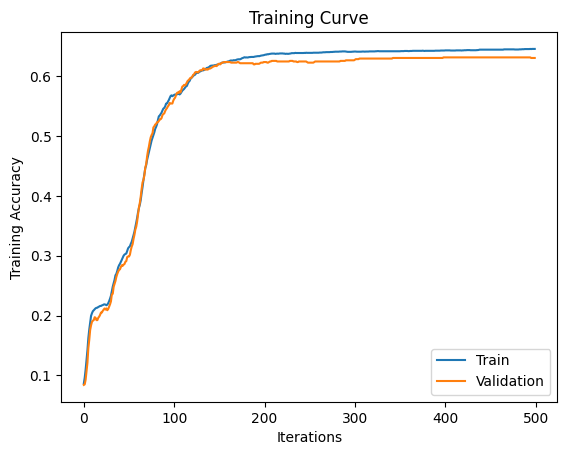

Final Training Accuracy: 0.64599609375
Final Validation Accuracy: 0.630859375
Accuracy on batch of 64:  1.0


In [ ]:
#overfitting the model (sanity check)
debug_data = mnist_train[:64]
model = Mnist_Classification_NN()
train(model, debug_data, num_epochs=500)

#obtain accuracy on 64 samples
correct = 0
total = 0
for imgs, labels in torch.utils.data.DataLoader(debug_data, batch_size=64):
    output = model(imgs)
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    
    #calculate number of correct predictions
    correct += pred.reshape(-1).eq(labels).sum().item()
    #correct += pred.eq(labels.view_as(pred)).sum().item() # labels.view_as(pred) forces labels to change from [64] to [64, 1].
    total += imgs.shape[0]
print('Accuracy on batch of 64: ', correct / total)

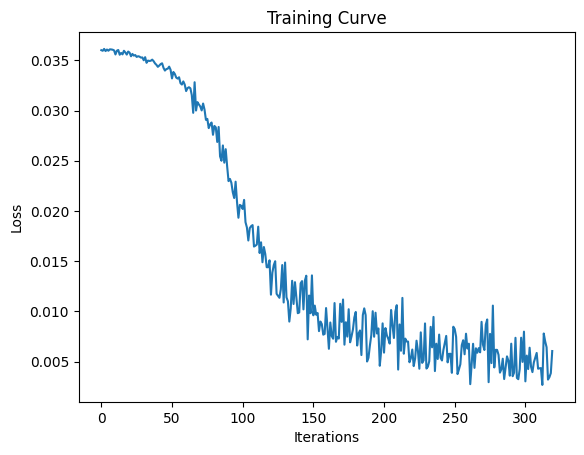

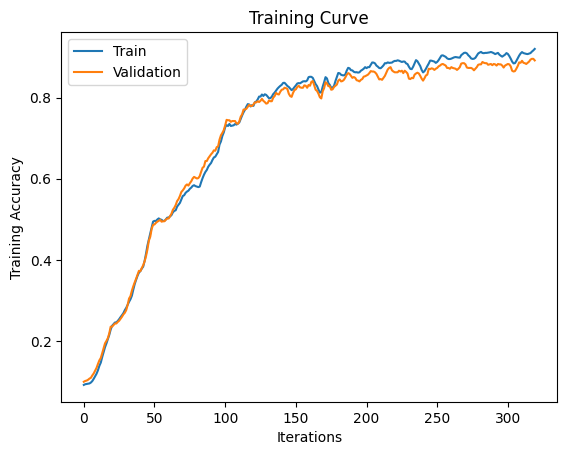

Final Training Accuracy: 0.919921875
Final Validation Accuracy: 0.8916015625


In [18]:
model = Mnist_Classification_NN()
train(model, mnist_train, num_epochs=5)